In [50]:
#Import Stuff
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, log_loss
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as sm

In [2]:
#Credit Data
df = pd.read_csv("credit_risk_dataset.csv")
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [3]:
#Real Estate
df = pd.read_csv("NYC_Real_Estate.csv")
df.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


<h1>Assignment 4</h1>
<h3>Overview</h3>
For this assignment you'll do a realistic exploration of data up to and including creating predictive regression model(s).
<h3>Data</h3>
The data is the included datasets:
<ul>
<li><h4>Linear Regression:</h4> "NYC_Real_Estate.csv", which is a subset of some real data on the housing market in NYC. You'll use this dataset to create a linear regression model.
<li><h4>Logistic Regression:</h4> "credit_risk_dataset.csv", which is a set of simulated credit data. You'll use this dataset to create a logistic regression classification model.
</ul>  

<h3>Part 1 - Data Preparation: Both Datasets</h3>
<h4>See the two previews above</h4>
<h4>Note: There's nothing that you explicitly need to produce here, it is getting your data ready for the next step. </h4>
The first part of your process should be to clean and prepare the data (each set). It is in its original form, so there's some stuff in there that isn't perfect. Some things to consider are:
<ul>
<li>Are the varaibles in the data relevant? Some may not be. Use both general knowledge and analysis to make a judgement. 
<li>Are there missing values? If so, what does that mean? Especially with the T/F columns in the data. 
<li>What data format is the data? Categorical/numerical? 
<li>Are there outliers? Should they stay?
</ul>

There's no expectation for you to do any extreme amount of research or analysis to use the data, the cleanup required should be reasonably simple, but required. What to keep/remove/change is up to you. There is not one fixed answer. As you make choices, note a justification. This preparation and clean up kind of blends into the EDA for each. 

<h3>Part 2 - Linear Regression - Real Estate Data: Sales Price (35% of grade)</h3>
You'll do a linear regression to predict the <b>SALES PRICE</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not. 

<h3>Part 3 - Logistic Regression - Credit Data: Loan Status (35% of grade)</h3>
You'll do a logistic regression to predict the <b>LOAN STATUS</b>. As part of this you'll need to do some EDA (exploratory data analysis) which will involve walking through exploring and visualizing the data to make sense of what is there, what is useful, and what is not.

<h3>Part 4 - Are the Models Good (15% of grade)</h3>
Please briefly note if the models you've created are good. Justify your answer. 

<h3>Overall Format (15% of grade)</h3>
Please make your workbook readable. Someone should be able to read through from end to end and get a solid understanding of what happened and what the findings were. The goal is to basically say, "here's a walkthrough of how I did this regression, and here are the results."

You Formatting is important in making things clear. This shouldn't end up being insanely complex, if it does, you've likely overthought it in some way. 

<h3>Data Dictionary and Documentation</h3>
<p>
For the real estate data, there are some notes in the real_estate_notes.txt file in this repository that explains some of the data values. The PDF is the 'glossary of terms" that the notes file refers to. 
</p>
<p>
For the credit data, there are some notes in the credit_notes.txt file. This one is really simple in terms of what the data is and means
</p>
<p>
I don't think that you need much background information to make sense of this data, it has been simplified a bit. If something doesn't make sense, please ask.
</p>

<h3>Tools, Technologies, and Techniques</h3>
<p>
You can use whatever tools/packages you'd like to do the regression and the EDA. Thinkstats, thinkplot, seaborn, scipy, scikitlearn, statsmodels, etc are all fair game, as are anything else. You'll just need to import them.
</p>

<h3>First Part - Credit Risk Data</h3>
<ul>
<li>Below, I am going to go througt the EDA and Logistic Regression based on the Credit Risk Dataset provided
<li>I will start by importing the data and taking a first view of it
</ul>

In [4]:
dfCred = pd.read_csv("credit_risk_dataset.csv")
dfCred.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


<lu>
<li>Having worked at the bank few years ago, whether someone rented/owned a house, employment lengt, loan interest, loan intent or the length of <li>someone's credit history did not sway the outcome of a loan application. Thus I chose to drop those columns.

In [5]:
dfCred = dfCred.drop(columns={'person_home_ownership', 'person_emp_length', 'loan_intent', 'cb_person_cred_hist_length', 'loan_int_rate'})
dfCred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   person_age                 32581 non-null  int64  
 1   person_income              32581 non-null  int64  
 2   loan_grade                 32581 non-null  object 
 3   loan_amnt                  32581 non-null  int64  
 4   loan_status                32581 non-null  int64  
 5   loan_percent_income        32581 non-null  float64
 6   cb_person_default_on_file  32581 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.7+ MB


In [6]:
#Checking for any null values
dfCred.isna().sum()

person_age                   0
person_income                0
loan_grade                   0
loan_amnt                    0
loan_status                  0
loan_percent_income          0
cb_person_default_on_file    0
dtype: int64

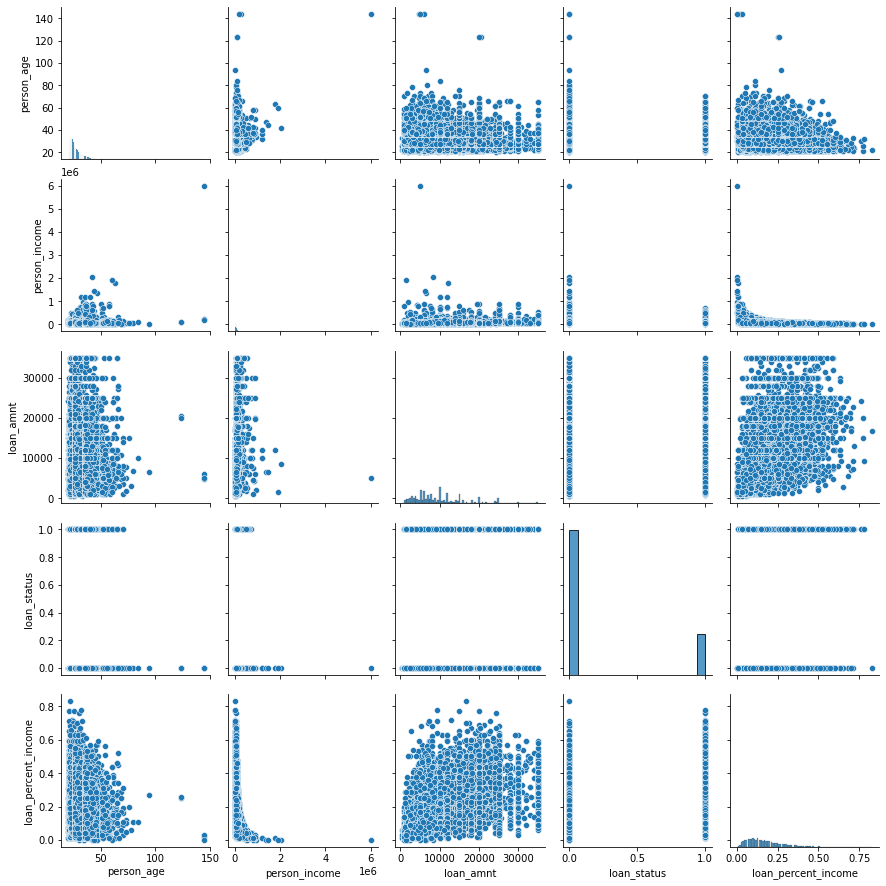

In [7]:
# Looking at the distribution of the data and the correlations
sns.pairplot(dfCred)

<li>From the above graphs, it does not look like we have strong correlation between the data. I also notice that the income and age columns have <li>some potenital outliers. Will explore correlation of the data

<AxesSubplot:>

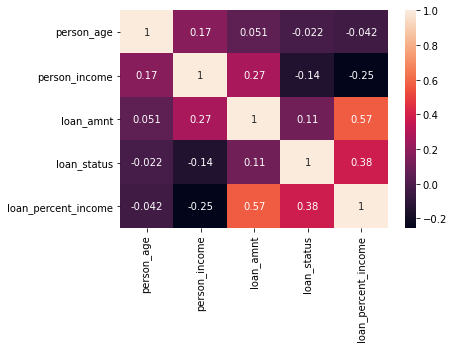

In [8]:
sns.heatmap(dfCred.corr(), annot=True)

<li>Income and loan percent of income have a very strong correlation. These two might be measuring relatively the same information. Will explore <li>further after creating the model.

In [9]:
dfCred.describe(include='all')

,person_age,person_income,loan_grade,loan_amnt,loan_status,loan_percent_income,cb_person_default_on_file
count,32581.000000,3.258100e+04,32581,32581.000000,32581.000000,32581.000000,32581
unique,NaN,NaN,7,NaN,NaN,NaN,2
top,NaN,NaN,A,NaN,NaN,NaN,N
freq,NaN,NaN,10777,NaN,NaN,NaN,26836
mean,27.734600,6.607485e+04,NaN,9589.371106,0.218164,0.170203,NaN
std,6.348078,6.198312e+04,NaN,6322.086646,0.413006,0.106782,NaN
min,20.000000,4.000000e+03,NaN,500.000000,0.000000,0.000000,NaN
25%,23.000000,3.850000e+04,NaN,5000.000000,0.000000,0.090000,NaN
50%,26.000000,5.500000e+04,NaN,8000.000000,0.000000,0.150000,NaN
75%,30.000000,7.920000e+04,NaN,12200.000000,0.000000,0.230000,NaN


In [10]:
dfCred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   person_age                 32581 non-null  int64  
 1   person_income              32581 non-null  int64  
 2   loan_grade                 32581 non-null  object 
 3   loan_amnt                  32581 non-null  int64  
 4   loan_status                32581 non-null  int64  
 5   loan_percent_income        32581 non-null  float64
 6   cb_person_default_on_file  32581 non-null  object 
dtypes: float64(1), int64(4), object(2)
memory usage: 1.7+ MB


In [11]:
# Changing the loan Status column into a categorical dataset
dfCred['loan_status'] = dfCred['loan_status'].astype('category')
dfCred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   person_age                 32581 non-null  int64   
 1   person_income              32581 non-null  int64   
 2   loan_grade                 32581 non-null  object  
 3   loan_amnt                  32581 non-null  int64   
 4   loan_status                32581 non-null  category
 5   loan_percent_income        32581 non-null  float64 
 6   cb_person_default_on_file  32581 non-null  object  
dtypes: category(1), float64(1), int64(3), object(2)
memory usage: 1.5+ MB


In [12]:
# Doing One-Hot encoding on the categorical data
tempCred = pd.get_dummies(dfCred, drop_first=True)
tempCred.head()

,person_age,person_income,loan_amnt,loan_percent_income,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,loan_status_1,cb_person_default_on_file_Y
0,22,59000,35000,0.59,0,0,1,0,0,0,1,1
1,21,9600,1000,0.10,1,0,0,0,0,0,0,0
2,25,9600,5500,0.57,0,1,0,0,0,0,1,0
3,23,65500,35000,0.53,0,1,0,0,0,0,1,0
4,24,54400,35000,0.55,0,1,0,0,0,0,1,1


In [13]:
# Now we are ready to set the data

y = np.array(tempCred['loan_status_1']).reshape(-1,1)
x = np.array(tempCred.drop(columns={'loan_status_1'}))
x.shape, y.shape

((32581, 11), (32581, 1))

In [18]:
# Dividing data into two groups and scalling the data

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
#Training the model, make predictions and priting the score
modelC = LogisticRegression(max_iter=1000).fit(X_train, y_train.ravel())

#Make predictions
predsC = modelC.predict(X_test)

score = modelC.score(X_test, y_test)
score

0.8434782608695652

<li>Looks like our model has a 84.35% accuracy. This is a good percentage and can rely on our model for predictions.

In [24]:
#Compare to baseline accuracy
dfCred["loan_status"].value_counts()

0    25473
1     7108
Name: loan_status, dtype: int64

<li>The baseline indicates that 78.18% of loans do not defalut. Our model scored 84.35%, which means we are doing better than the baseline

In [21]:
def convert_prob_to_label(prob, cutoff = 0.5):
    label = []
    for i in range(len(prob)):
        if prob[i] > cutoff:
            label.append(1)
        else:
            label.append(0)
    return label

F1: 0.5704660303200448
Acc: 0.8434782608695652


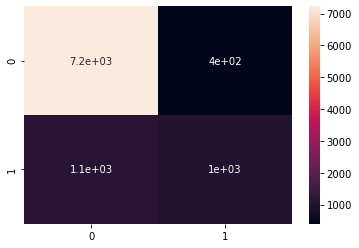

In [23]:
# Looking at the confusion matrix and other scores

labelsC = convert_prob_to_label(np.array(predsC))
conf_matrix2 = confusion_matrix(y_test,labelsC)
sns.heatmap(conf_matrix2, annot=True)

print("F1:",f1_score(y_test, labelsC))
print("Acc:",accuracy_score(y_test, labelsC))

<li>Our model is doing good thus far. However, I am going to explore the stat model and see if I can improve our model by ommiting some <li>redundant colums

In [34]:
dfCred_.columns

Index(['person_age', 'person_income', 'loan_amnt', 'loan_percent_income',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'loan_status_1',
       'cb_person_default_on_file_Y'],
      dtype='object')

In [26]:
#Encode all data
dfCred_ = pd.get_dummies(data=dfCred, drop_first=True)

In [30]:
#Creating the stats model. 
formCred = "loan_status_1 ~ person_age + person_income + loan_grade_B + loan_grade_C + loan_grade_D + loan_grade_E + loan_grade_F + loan_grade_G + loan_amnt + loan_percent_income + cb_person_default_on_file_Y"
modelC_SM = sm.logit(data=dfCred_, formula=formCred).fit()
modelC_SM.summary()

Optimization terminated successfully.
         Current function value: 0.370165
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:          loan_status_1   No. Observations:                32581
Model:                          Logit   Df Residuals:                    32569
Method:                           MLE   Df Model:                           11
Date:                Sat, 04 Dec 2021   Pseudo R-squ.:                  0.2944
Time:                        09:00:03   Log-Likelihood:                -12060.
converged:                       True   LL-Null:                       -17091.
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.6291      0.092    -39.547      0.000      -3.809      -3.449
person_age                     -0.0004      0.003     -0.148      0.882      -0.006       0.005
person_income                4.616e-08   5.39e-07      0.086      0.932   -1.01e-06     1.1e-06
loan_grade_B                    0.5239      0.047     11.263      0.000       0.433       0.615
loan_grade_C                    0.8929      0.055     16.299      0.000       0.786       1.000
loan_grade_D                    2.9052      0.058     49.698      0.000       2.791       3.020
loan_grade_E                    3.2419      0.088     36.999      0.000       3.070       3.414
loan_grade_F                    3.6477      0.163     22.385      0.000       3.328       3.967
loan_grade_G                    7.1531      1.019      7.019      0.000       5.156       9.151
loan_amnt                      -0.0001   4.29e-06    -24.813      0.000      -0.000   -9.79e-05
loan_percent_income            12.4742      0.244     51.123      0.000      11.996      12.952
cb_person_default_on_file_Y    -0.0077      0.047     -0.163      0.870      -0.100       0.085
===============================================================================================
"""

<li>Based on the P values obtained from the stats model, Default on File, Income and Age are irelevant in terms of predicting whether someone <li>will default on their loan. I will go ahead and ommit those and see if it does improve our model's accuracy.

In [38]:
#Drop Default on File, Income and Age 
dfCred1 = dfCred_.drop(columns={"person_age", "person_income", "cb_person_default_on_file_Y"}) 

#Prep the data for creating the model
xC2 = np.array(dfCred1)
xC2.shape, y.shape

((32581, 9), (32581, 1))

In [46]:
# Splitting the data
X_train1, X_test1, y_train1, y_test1 = train_test_split(xC2,y, test_size=.3)

# Scale the data
scaler = StandardScaler()
X_trainC = scaler.fit_transform(X_train1)
X_testC = scaler.transform(X_test1)

In [47]:
#Training the model, make predictions and priting the score
modelC1 = LogisticRegression(max_iter=1000).fit(X_trainC, y_train1.ravel())

#Make predictions
predsC1 = modelC1.predict(X_testC)

score = modelC1.score(X_testC, y_test1)
score

1.0

<li>Our score went way up. This did increase our accuracy significantly. I will explore the confusion matrix

F1: 1.0
Acc: 1.0
Recall: 1.0
Precision: 1.0


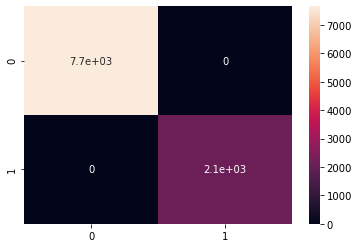

In [51]:
# Looking at the confusion matrix and other scores

labelsC1 = convert_prob_to_label(np.array(predsC1))
conf_matrix = confusion_matrix(y_test1,labelsC1)
sns.heatmap(conf_matrix, annot=True)

print("F1:",f1_score(y_test1, labelsC1))
print("Acc:",accuracy_score(y_test1, labelsC1))
print("Recall:",recall_score(y_test1, labelsC1))
print("Precision:",precision_score(y_test1, labelsC1))

<li>Looks like our model did improve significantly by taking out the non related columns of data.

<h3>Second Part - Real Estate Data</h3>
<ul>
<li>Below I am going to go througt the EDA and Linear Regression based on the Real Estate Dataset provided in order to predict the Sale Price of <li>a house. I will start by importing the data and taking a view of it.
</ul>

In [49]:
dfRe = pd.read_csv("NYC_Real_Estate.csv")
dfRe.head()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,10009,5,5,6440,1900,Low,C2,6625000
1,1,402,21,10009,10,10,6794,1913,Low,C4,3936272
2,1,404,55,10009,6,6,4615,1900,Low,C2,8000000
3,1,406,32,10009,8,8,4226,1920,Low,C4,3192840
4,1,387,153,10009,24,24,18523,1920,Low,D9,16232000


In [57]:
#Checking for any null values
dfRe.isna().sum()

BOROUGH                           0
BLOCK                             0
LOT                               0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
TOTAL UNITS                       0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
dtype: int64

In [52]:
dfRe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48248 entries, 0 to 48247
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         48248 non-null  int64 
 1   BLOCK                           48248 non-null  int64 
 2   LOT                             48248 non-null  int64 
 3   ZIP CODE                        48248 non-null  int64 
 4   RESIDENTIAL UNITS               48248 non-null  int64 
 5   TOTAL UNITS                     48248 non-null  int64 
 6   GROSS SQUARE FEET               48248 non-null  int64 
 7   YEAR BUILT                      48248 non-null  int64 
 8   TAX CLASS AT TIME OF SALE       48248 non-null  object
 9   BUILDING CLASS AT TIME OF SALE  48248 non-null  object
 10  SALE PRICE                      48248 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 4.0+ MB


<li>According to the data context, Borough should be categorical since it references to the area of the city (ie Bronx,Brooklyn ect). Also, zip <li>code should be categorical. I will have to change this into a categorical data before analysis. The rest look about right.

In [55]:
dfRe['BOROUGH']=dfRe['BOROUGH'].astype('category')
dfRe['ZIP CODE']=dfRe['ZIP CODE'].astype('category')
dfRe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48248 entries, 0 to 48247
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         48248 non-null  category
 1   BLOCK                           48248 non-null  int64   
 2   LOT                             48248 non-null  int64   
 3   ZIP CODE                        48248 non-null  category
 4   RESIDENTIAL UNITS               48248 non-null  int64   
 5   TOTAL UNITS                     48248 non-null  int64   
 6   GROSS SQUARE FEET               48248 non-null  int64   
 7   YEAR BUILT                      48248 non-null  int64   
 8   TAX CLASS AT TIME OF SALE       48248 non-null  object  
 9   BUILDING CLASS AT TIME OF SALE  48248 non-null  object  
 10  SALE PRICE                      48248 non-null  int64   
dtypes: category(2), int64(7), object(2)
memory usage: 3.5+ MB


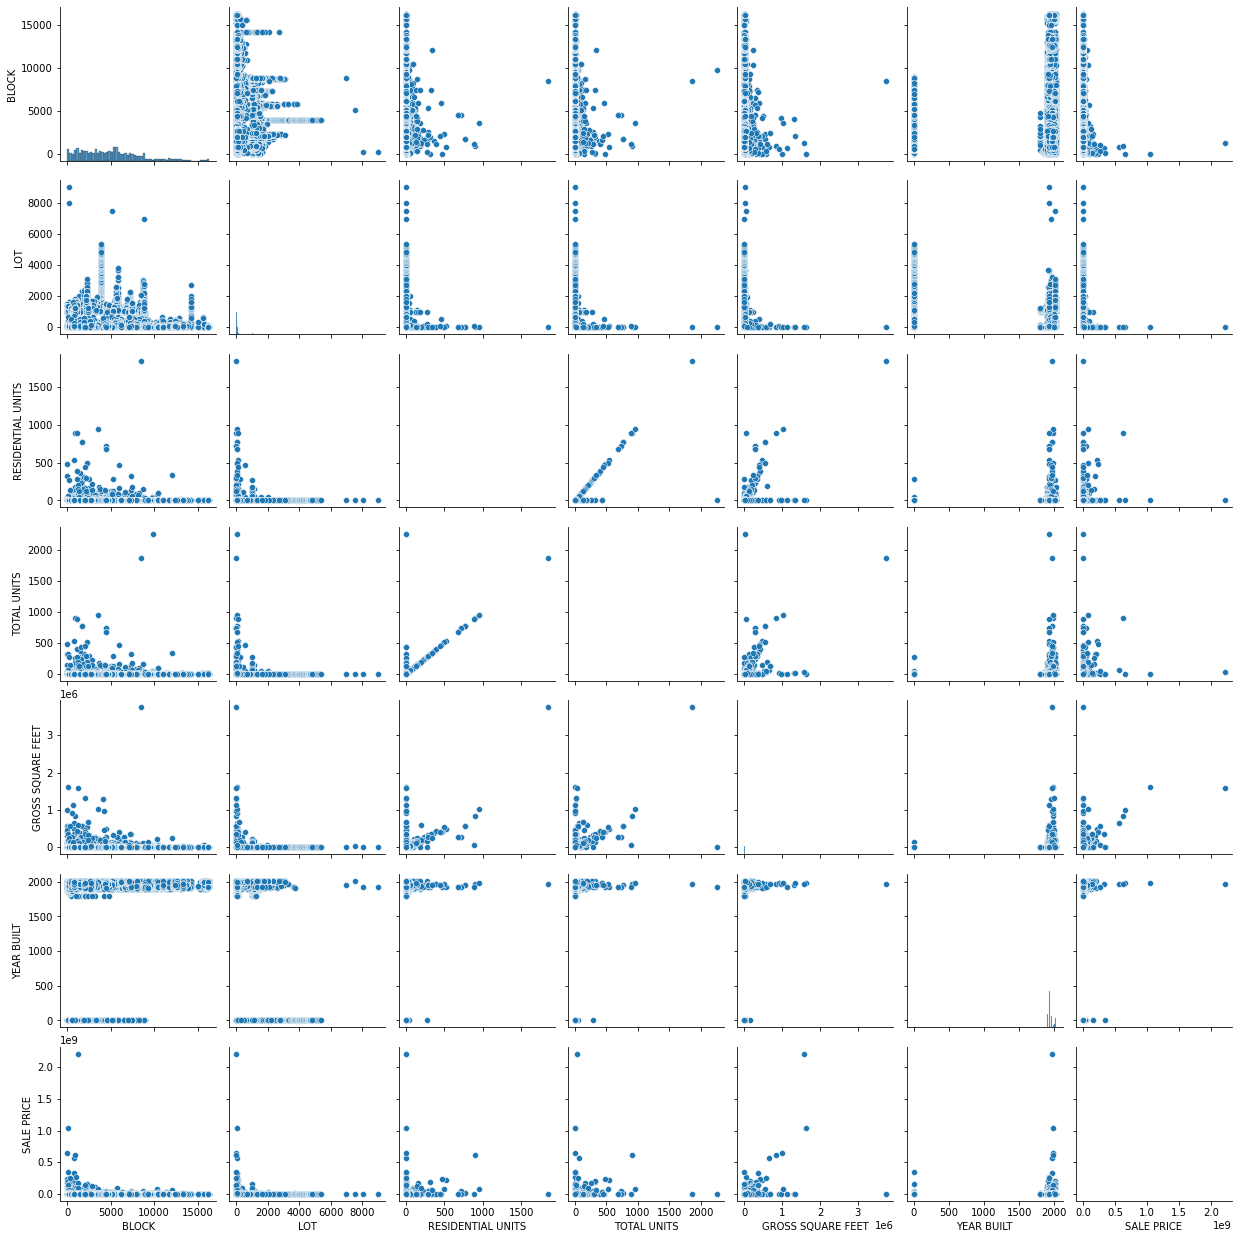

In [59]:
# Visualizing the data
sns.pairplot(dfRe)

<li>Looks like there are some houses that did not have listed Year Built or it was simply entered as zero. Also, looks like there are houses <li>that are quite over priced. And also there are house with a very high square footage. Last but not least, there is a lot that is also high. <li>I am going to get rid of those. 

In [81]:
# Cleaning up the outliers
dfRe = dfRe[dfRe['YEAR BUILT']>1800]
dfRe = dfRe[dfRe['SALE PRICE']<565000000]
dfRe = dfRe[dfRe['GROSS SQUARE FEET']<1000000]
dfRe = dfRe[dfRe['LOT']<7500]

In [82]:
dfRe['LOT'].nlargest(10)

2821     3710
2819     3597
2845     3250
2846     3250
2847     3250
30496    3104
13211    3062
2827     3037
2828     3037
2829     3037
Name: LOT, dtype: int64

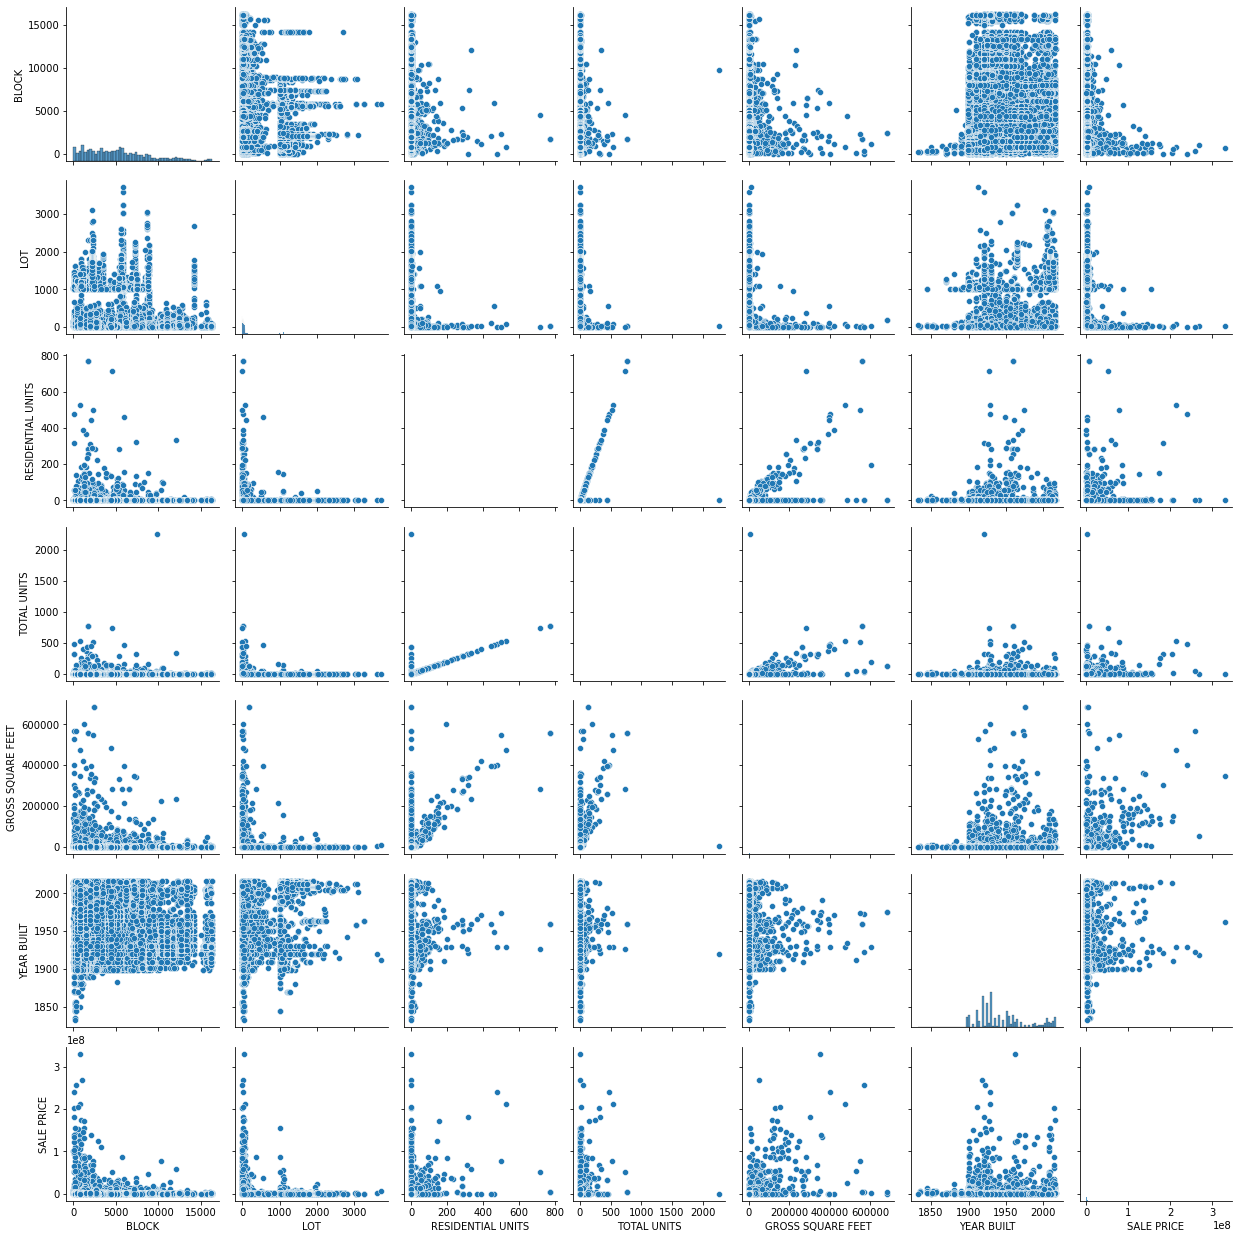

In [83]:
# Visualizing the data for the second time
sns.pairplot(dfRe)

In [89]:
# Exploring the correlations
corr = dfRe.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

,BLOCK,LOT,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
BLOCK,1.00,-0.18,-0.06,-0.04,-0.08,-0.02,-0.12
LOT,-0.18,1.00,-0.04,-0.03,-0.06,0.44,-0.02
RESIDENTIAL UNITS,-0.06,-0.04,1.00,0.73,0.66,-0.03,0.26
TOTAL UNITS,-0.04,-0.03,0.73,1.00,0.54,-0.02,0.24
GROSS SQUARE FEET,-0.08,-0.06,0.66,0.54,1.00,-0.00,0.49
YEAR BUILT,-0.02,0.44,-0.03,-0.02,-0.00,1.00,-0.03
SALE PRICE,-0.12,-0.02,0.26,0.24,0.49,-0.03,1.00


<li> Residental units and total units are strongly correlated. I suspect they are measuring similar things. Will leave them for now and adjust <li> after looking at the stats model. The next strongest is between SQ Feet and Residential Units

In [87]:
dfRe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35251 entries, 0 to 48247
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         35251 non-null  category
 1   BLOCK                           35251 non-null  int64   
 2   LOT                             35251 non-null  int64   
 3   ZIP CODE                        35251 non-null  category
 4   RESIDENTIAL UNITS               35251 non-null  int64   
 5   TOTAL UNITS                     35251 non-null  int64   
 6   GROSS SQUARE FEET               35251 non-null  int64   
 7   YEAR BUILT                      35251 non-null  int64   
 8   TAX CLASS AT TIME OF SALE       35251 non-null  object  
 9   BUILDING CLASS AT TIME OF SALE  35251 non-null  object  
 10  SALE PRICE                      35251 non-null  int64   
dtypes: category(2), int64(7), object(2)
memory usage: 2.8+ MB


<AxesSubplot:xlabel='BUILDING CLASS AT TIME OF SALE', ylabel='SALE PRICE'>

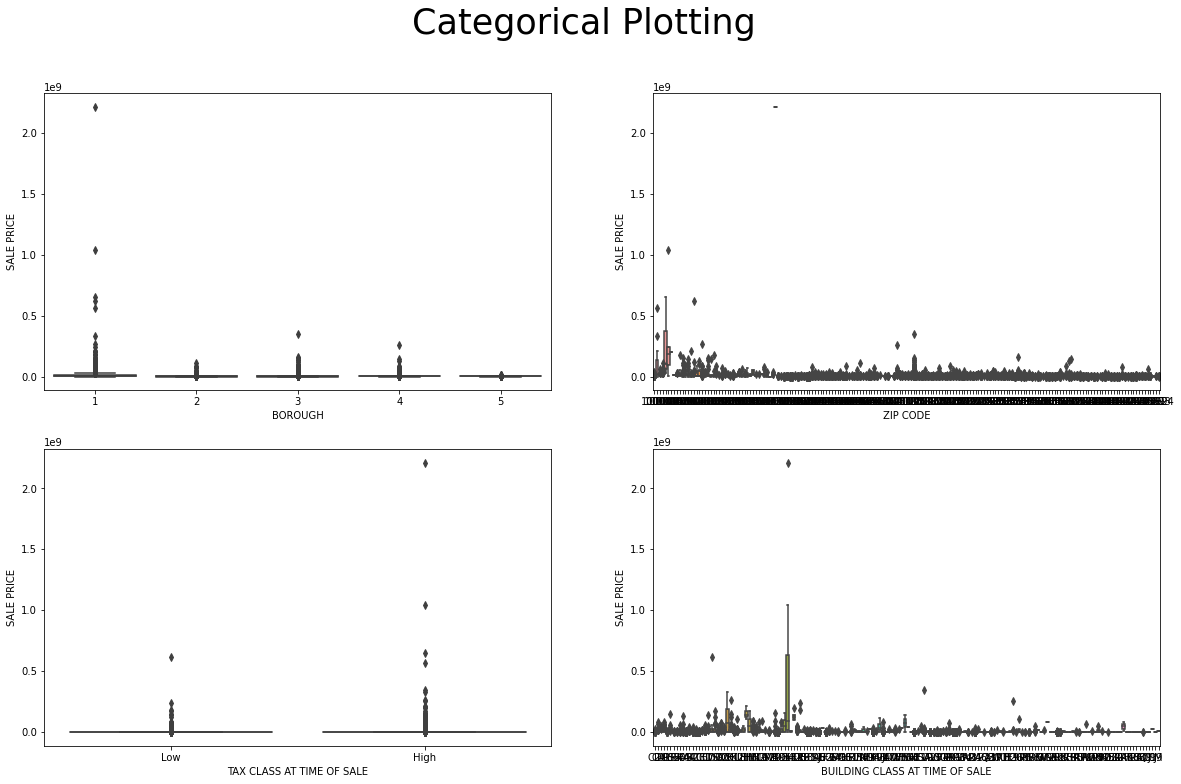

In [88]:
# Exploring Categorical Data
fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,12))
fig.suptitle("Categorical Plotting", fontsize=35)
sns.boxplot(x="BOROUGH", y="SALE PRICE", data=df,ax=ax[0,0])
sns.boxplot(x="ZIP CODE", y="SALE PRICE", data=df,ax=ax[0,1])
sns.boxplot(x="TAX CLASS AT TIME OF SALE", y="SALE PRICE", data=df,ax=ax[1,0])
sns.boxplot(x="BUILDING CLASS AT TIME OF SALE", y="SALE PRICE", data=df,ax=ax[1,1])

<li> Builidng class has a lot of different options. So does Zip Code. I suspect Zip Code is a granular opton of Borough. I will leave them for <li>now and see what the stats model will indicate in terms of their relevance in predicting the sale price.

In [90]:
# Preping the data for regression
nyc = pd.get_dummies(dfRe, drop_first=True)
nyc.head(5)

,BLOCK,LOT,RESIDENTIAL UNITS,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE,BOROUGH_2,BOROUGH_3,BOROUGH_4,...,BUILDING CLASS AT TIME OF SALE_V1,BUILDING CLASS AT TIME OF SALE_W1,BUILDING CLASS AT TIME OF SALE_W2,BUILDING CLASS AT TIME OF SALE_W3,BUILDING CLASS AT TIME OF SALE_W4,BUILDING CLASS AT TIME OF SALE_W8,BUILDING CLASS AT TIME OF SALE_W9,BUILDING CLASS AT TIME OF SALE_Y3,BUILDING CLASS AT TIME OF SALE_Z0,BUILDING CLASS AT TIME OF SALE_Z9
0,392,6,5,5,6440,1900,6625000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,402,21,10,10,6794,1913,3936272,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,404,55,6,6,4615,1900,8000000,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,406,32,8,8,4226,1920,3192840,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,387,153,24,24,18523,1920,16232000,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
# Dividing the data into Train/Test
y = nyc['SALE PRICE']
x = nyc.drop(columns={'SALE PRICE'})

y = np.array(y).reshape(-1,1)
x = np.array(x)

xTrain,xTest,yTrain,yTest = train_test_split(x,y,test_size=.3)

xTrain.shape, yTrain.shape

((24675, 336), (24675, 1))

In [104]:
# I am going to start with the Stats Model so I can get the P values
import statsmodels.api as sm
X = sm.add_constant(xTrain)
est = sm.OLS(yTrain,X)
est1 = est.fit()
print(est1.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.673
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     156.1
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        12:30:13   Log-Likelihood:            -4.0815e+05
No. Observations:               24675   AIC:                         8.169e+05
Df Residuals:                   24353   BIC:                         8.196e+05
Df Model:                         321                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        2.15e+06   4.57e+06      0.471      0.6

<li> Based on the stats model above, our R-square is about 65% which means our data fits the model about 65% of the time. I am going to try and <li>take out the Zip Code data since we can sort of capture that on the Borough column. Also when we were exploring the data, we did find out <li>that Residential Unit is highly correlated to Total Unit. Thus, I will also take out Residential Unit and keep Total Units.

In [105]:
# Doing the model the Ski Learn way
model = LinearRegression()
model.fit(xTrain,yTrain)

preds = model.predict(xTest)

print(mean_squared_error(yTest,preds))
print(r2_score(yTest,preds))

27619371941689.145
0.23763087630257318


In [110]:
nyc1 = dfRe.drop(columns={'ZIP CODE','RESIDENTIAL UNITS'})
nyc1.head()

,BOROUGH,BLOCK,LOT,TOTAL UNITS,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE
0,1,392,6,5,6440,1900,Low,C2,6625000
1,1,402,21,10,6794,1913,Low,C4,3936272
2,1,404,55,6,4615,1900,Low,C2,8000000
3,1,406,32,8,4226,1920,Low,C4,3192840
4,1,387,153,24,18523,1920,Low,D9,16232000


In [112]:
# Prep the Data
nyc1 = pd.get_dummies(nyc1, drop_first=True)
y1 = nyc1['SALE PRICE']
x1 = nyc1.drop(columns={'SALE PRICE'})

y1 = np.array(y1).reshape(-1,1)
x1 = np.array(x1)

xTrain1,xTest1,yTrain1,yTest1 = train_test_split(x1,y1,test_size=.3)

# Create the model
X1 = sm.add_constant(xTrain1)
est = sm.OLS(yTrain1,X1)
est1 = est.fit()
print(est1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.632
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     285.0
Date:                Sat, 04 Dec 2021   Prob (F-statistic):               0.00
Time:                        13:17:48   Log-Likelihood:            -4.0885e+05
No. Observations:               24675   AIC:                         8.180e+05
Df Residuals:                   24526   BIC:                         8.192e+05
Df Model:                         148                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        1.56e+07   1.87e+06      8.327      0.0

In [114]:
# Doing the model the Ski Learn way
model1 = LinearRegression()
model1.fit(xTrain1,yTrain1)

preds1 = model1.predict(xTest1)

print(mean_squared_error(yTest1,preds1))
print(r2_score(yTest1,preds1))

29393618403857.04
0.29883505802378296


<li> Our R2 score did increase a little after taking out the Zip Code, however our R-Square value also dropped
<li> Based on those metrics, we can not rely on this model